In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
       # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | leningradskiy
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | tilichiki
Processing Record 7 of Set 1 | exokhi
City not found. Skipping...
Processing Record 8 of Set 1 | suntar
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | qaqortoq
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | rawson
Processing Record 15 of Set 1 | saleaula
City not found. Skipping...
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | chumphon
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | otjimbingwe
Processing Record 20 of Set 1 | pisco
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | bred

Processing Record 38 of Set 4 | pochutla
Processing Record 39 of Set 4 | finnsnes
Processing Record 40 of Set 4 | georgetown
Processing Record 41 of Set 4 | nortelandia
Processing Record 42 of Set 4 | severnyy
Processing Record 43 of Set 4 | ketchikan
Processing Record 44 of Set 4 | cumaribo
City not found. Skipping...
Processing Record 45 of Set 4 | dali
Processing Record 46 of Set 4 | sarangani
Processing Record 47 of Set 4 | queanbeyan
Processing Record 48 of Set 4 | souillac
Processing Record 49 of Set 4 | barawe
City not found. Skipping...
Processing Record 50 of Set 4 | shkurinskaya
Processing Record 1 of Set 5 | panacan
Processing Record 2 of Set 5 | makat
Processing Record 3 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 5 | inta
Processing Record 5 of Set 5 | kruisfontein
Processing Record 6 of Set 5 | moron
Processing Record 7 of Set 5 | vancouver
Processing Record 8 of Set 5 | kajaani
Processing Record 9 of Set 5 | nhulunbuy
Processing Record 

Processing Record 29 of Set 8 | mandalgovi
Processing Record 30 of Set 8 | nogales
Processing Record 31 of Set 8 | zaoyang
Processing Record 32 of Set 8 | lima
Processing Record 33 of Set 8 | porto torres
Processing Record 34 of Set 8 | yarada
Processing Record 35 of Set 8 | samut sakhon
Processing Record 36 of Set 8 | koumac
Processing Record 37 of Set 8 | poronaysk
Processing Record 38 of Set 8 | beisfjord
Processing Record 39 of Set 8 | coquimbo
Processing Record 40 of Set 8 | sorvag
City not found. Skipping...
Processing Record 41 of Set 8 | bacalar
Processing Record 42 of Set 8 | togul
Processing Record 43 of Set 8 | uni
Processing Record 44 of Set 8 | dutlwe
Processing Record 45 of Set 8 | qiryat shemona
Processing Record 46 of Set 8 | williamsport
Processing Record 47 of Set 8 | kalmunai
Processing Record 48 of Set 8 | pimampiro
Processing Record 49 of Set 8 | taoudenni
Processing Record 50 of Set 8 | dalinghe
City not found. Skipping...
Processing Record 1 of Set 9 | awbari
Pro

Processing Record 13 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 14 of Set 12 | kuche
City not found. Skipping...
Processing Record 15 of Set 12 | georgiyevka
Processing Record 16 of Set 12 | buenos aires
Processing Record 17 of Set 12 | texarkana
Processing Record 18 of Set 12 | sept-iles
Processing Record 19 of Set 12 | soyo
Processing Record 20 of Set 12 | villa maria
Processing Record 21 of Set 12 | longlac
City not found. Skipping...
Processing Record 22 of Set 12 | olinda
Processing Record 23 of Set 12 | mawlaik
Processing Record 24 of Set 12 | iquitos
Processing Record 25 of Set 12 | hurghada
Processing Record 26 of Set 12 | erdenet
Processing Record 27 of Set 12 | clarence town
Processing Record 28 of Set 12 | bathsheba
Processing Record 29 of Set 12 | rabo de peixe
Processing Record 30 of Set 12 | bolshoye polpino
City not found. Skipping...
Processing Record 31 of Set 12 | taksimo
Processing Record 32 of Set 12 | mayumba
Processing Record 33 of Set 1

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Leningradskiy,69.3833,178.4167,-3.96,93,100,13.20,RU,2021-03-24 23:21:56
1,Hilo,19.7297,-155.0900,84.20,51,40,16.11,US,2021-03-24 23:21:56
2,Ushuaia,-54.8000,-68.3000,42.80,75,20,36.82,AR,2021-03-24 23:18:07
3,East London,-33.0153,27.9116,68.47,86,100,11.88,ZA,2021-03-24 23:21:56
4,Iqaluit,63.7506,-68.5145,-18.00,69,75,7.58,CA,2021-03-24 23:21:57
5,Tilichiki,60.4667,166.1000,12.58,86,100,9.93,RU,2021-03-24 23:21:57
6,Suntar,62.1444,117.6319,-10.88,100,100,3.11,RU,2021-03-24 23:21:57
7,Hermanus,-34.4187,19.2345,66.99,84,4,5.01,ZA,2021-03-24 23:21:58
8,Port Elizabeth,-33.9180,25.5701,68.00,83,0,8.05,ZA,2021-03-24 23:21:58
9,Chokurdakh,70.6333,147.9167,-16.67,97,99,5.88,RU,2021-03-24 23:21:58


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Leningradskiy,RU,2021-03-24 23:21:56,69.3833,178.4167,-3.96,93,100,13.20
1,Hilo,US,2021-03-24 23:21:56,19.7297,-155.0900,84.20,51,40,16.11
2,Ushuaia,AR,2021-03-24 23:18:07,-54.8000,-68.3000,42.80,75,20,36.82
3,East London,ZA,2021-03-24 23:21:56,-33.0153,27.9116,68.47,86,100,11.88
4,Iqaluit,CA,2021-03-24 23:21:57,63.7506,-68.5145,-18.00,69,75,7.58
5,Tilichiki,RU,2021-03-24 23:21:57,60.4667,166.1000,12.58,86,100,9.93
6,Suntar,RU,2021-03-24 23:21:57,62.1444,117.6319,-10.88,100,100,3.11
7,Hermanus,ZA,2021-03-24 23:21:58,-34.4187,19.2345,66.99,84,4,5.01
8,Port Elizabeth,ZA,2021-03-24 23:21:58,-33.9180,25.5701,68.00,83,0,8.05
9,Chokurdakh,RU,2021-03-24 23:21:58,70.6333,147.9167,-16.67,97,99,5.88


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

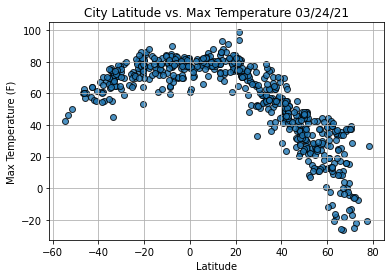

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

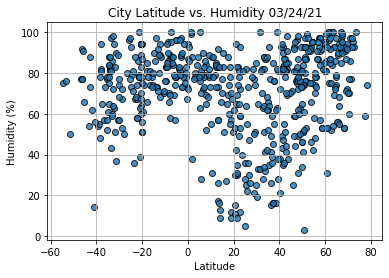

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

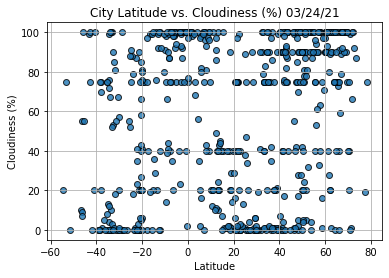

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()